<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [7]:
import pandas as pd
from sqlalchemy import create_engine, text

In [8]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = ''
USER = ''
PASSWORD = ''
HOST = ''
PORT = 

In [9]:
# установка коннекта
url = f'postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}'
engine = create_engine(url)

def sql_query(sql):
    with engine.connect().execution_options(autocommit=True) as conn:
        return pd.read_sql(sql=text(sql), con=conn)


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [10]:
# текст запроса
query_3_1 = (f'''
    SELECT COUNT(*) FROM vacancies
''')

In [11]:
# результат запроса
sql_query(query_3_1)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [12]:
# текст запроса
query_3_2 = f'''
    SELECT COUNT(*) from employers
'''

In [13]:
# результат запроса
sql_query(query_3_2)

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [14]:
# текст запроса
query_3_3 = f'''
    SELECT COUNT(*) FROM areas
'''


In [15]:
# результат запроса
sql_query(query_3_3)

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [16]:
# текст запроса
query_3_4 = f'''
    SELECT COUNT(*) FROM industries
'''

In [17]:
# результат запроса
sql_query(query_3_4)

,count
0,294


***

### выводы по предварительному анализу данных
* Вакансий - 49197
* Работодателей - 23501
* Регионов - 1362
* Сфер деятельности - 294

Можно предположить, что 
* в среднем каждый работодатель открывает больше чем одну вакансию (или же есть работодатели со множеством вакансий)
* в каждом регионе есть множество работодателей
* вакансии из одной и той же сферы окрыты в разных регионах




# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [18]:
# текст запроса
query_4_1 = f'''
    SELECT 
        a.name as area,
        COUNT(v.id) cnt
    FROM
        vacancies v
        INNER JOIN areas a ON a.id = v.area_id
    GROUP BY a.id
    ORDER BY cnt DESC
    LIMIT 5
'''

In [19]:
# результат запроса
sql_query(query_4_1)

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [20]:
# текст запроса
query_4_2 = f'''
    SELECT COUNT(*)
    FROM vacancies
    WHERE salary_from IS NOT NULL
        OR salary_to IS NOT NULL
'''

In [21]:
# результат запроса
sql_query(query_4_2)

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [22]:
# текст запроса
query_4_3 = f'''
    SELECT 
        ROUND(AVG(salary_from)) as avg_salary_from,
        ROUND(AVG(salary_to)) as avg_salary_to
    FROM vacancies
'''

In [23]:
# результат запроса
sql_query(query_4_3)

,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [24]:
# текст запроса
query_4_4 = f'''
    SELECT 
        schedule,
        employment,
        COUNT(*) as total
    FROM
        vacancies
    GROUP BY schedule, employment
    ORDER BY total DESC
'''

In [25]:
# результат запроса
sql_query(query_4_4)

,schedule,employment,total
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [26]:
# текст запроса
query_4_5 = f'''
    SELECT 
        experience,
        COUNT(*) as total
    FROM
        vacancies
    GROUP BY experience
    ORDER BY total
'''

In [27]:
# результат запроса
sql_query(query_4_5)

,experience,total
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

### выводы по детальному анализу вакансий

* количество вакансия прямо пропорционально популяции региона
* почти в половине вакансий (24 073 из 49 197) указана зарплата (или минимальная, или максимальная)
* средняя вилка вакансий от 71 065 до 110 537 рублей
* наиболее требуемая вакансия - полная занятость на полный день
* для наибольшего числа вакансий требуется опыт работы от 1 года до 3 лет

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [28]:
# текст запроса
query_5_1 = f'''
    SELECT 
        t.name as employer,
        COUNT(t.id) cnt
    FROM
        vacancies v
        INNER JOIN employers t ON t.id = v.employer_id
    GROUP BY t.id
    ORDER BY cnt DESC
    LIMIT 5
'''

In [29]:
# результат запроса
sql_query(query_5_1)

,employer,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [30]:
# текст запроса
query_5_2 = f'''
    (
        SELECT 
            a.name,
            COUNT(v.id) as total_vacancies,
            COUNT(e.id) as total_employers
        FROM 
            areas a
            LEFT JOIN vacancies v ON v.area_id = a.id
            LEFT JOIN employers e ON e.area = a.id
        WHERE
            v.id IS NULL
        GROUP BY a.id
        ORDER BY total_employers DESC
    ) UNION ALL (
        SELECT 
            a.name,
            COUNT(v.id) as total_vacancies,
            COUNT(e.id) as total_employers
        FROM 
            areas a
            LEFT JOIN vacancies v ON v.area_id = a.id
            LEFT JOIN employers e ON e.area = a.id
        WHERE
            v.id IS NOT NULL
        GROUP BY a.id
    )
'''

In [31]:
# результат запроса
sql_query(query_5_2)

,name,total_vacancies,total_employers
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Ростовская область,0,18
...,...,...,...
1357,Вольно-Надеждинское,3,0
1358,Актогай,1,0
1359,Большие Вязёмы,1,0
1360,Софьино (Раменский район),2,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [32]:
# текст запроса
query_5_3 = f'''
    SELECT
        e.name,
        COUNT(DISTINCT v.area_id) as total
    FROM
        employers e
        LEFT JOIN vacancies v ON v.employer_id = e.id
    GROUP BY e.id
    ORDER BY total DESC
'''

In [33]:
# результат запроса
sql_query(query_5_3)

,name,total
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23496,Но Смокинг,0
23497,МАСТЕРСКАЯ CREED,0
23498,Dzing Finance,0
23499,КОРС,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [34]:
# текст запроса
query_5_4 = f'''
    SELECT 
        COUNT(*) as total
    FROM
        employers
    WHERE 
        id NOT IN (SELECT DISTINCT employer_id FROM employers_industries)
'''

In [35]:
# результат запроса
sql_query(query_5_4)

,total
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [36]:
# текст запроса
query_5_5 = f'''
    SELECT 
        e.name,
        COUNT(*) total
    FROM
        employers e
        LEFT JOIN employers_industries i ON i.employer_id = e.id
    GROUP BY e.id
    HAVING COUNT(*) = 4
    ORDER BY e.name
'''

In [37]:
# результат запроса
sql_query(query_5_5)

,name,total
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4
...,...,...
1133,ЮРИОН,4
1134,ЮТИП Технологии,4
1135,ЯКласс,4
1136,ЯрНео,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [38]:
# текст запроса
query_5_6 = f'''
    SELECT 
        COUNT(*)
    FROM
        employers e, employers_industries ei, industries i
    WHERE
        e.id = ei.employer_id 
        AND ei.industry_id = i.id
        AND i.name = 'Разработка программного обеспечения'
'''

In [39]:
# результат запроса
sql_query(query_5_6)

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [40]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
cities = list(pd.read_html(url)[1]['Город'])
print(cities)


['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж[a]', 'Пермь', 'Волгоград']


In [41]:
# текст запроса
query_5_7 = f'''
    (
        SELECT
            a.name,
            COUNT(v.id) as cnt
        FROM
            areas a
            LEFT JOIN vacancies v ON v.area_id = a.id
            LEFT JOIN employers e ON e.id = v.employer_id
        WHERE
            a.name IN ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград') 
            AND e.name = 'Яндекс'
        GROUP BY a.id
    ) UNION ALL (
        SELECT
            'Total' as name,
            COUNT(v.id) as cnt
        FROM
            areas a
            LEFT JOIN vacancies v ON v.area_id = a.id
            LEFT JOIN employers e ON e.id = v.employer_id
        WHERE
            a.name IN ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград') 
            AND e.name = 'Яндекс'
    )
    ORDER BY 2
'''

In [42]:
# результат запроса
sql_query(query_5_7)

,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***

### выводы по анализу работодателей

* наибольшее количество открытых вакансий у Яндекса
* в таблице регионов перемешаны города, области и страны
* у 17% (8 419 из 49 197) работодателей не указана сфера деятельности
* только 25% (485 из 1 933) вакансий открыты Яндексом в городах-милионниках

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [43]:
# текст запроса
query_6_1 = f'''
    SELECT COUNT(*) FROM vacancies WHERE name ILIKE '%данн%' OR name ILIKE '%data%'
'''

In [44]:
# результат запроса
sql_query(query_6_1)

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [45]:
# текст запроса
query_6_2 = f'''
    SELECT
        COUNT(*) as cnt
    FROM
        vacancies
    WHERE
        (
            name ILIKE '%data scientist%'
            OR name ILIKE '%data science%'
            OR name ILIKE '%исследователь данных%'
            OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
            OR name ILIKE '%machine learning%'
            OR name ILIKE '%машинн%обучен%'
        )
        AND
        (
            name ILIKE '%junior%'
            OR experience = 'Нет опыта'
            OR employment = 'Стажировка'
        )
'''

In [46]:
# результат запроса
sql_query(query_6_2)

,cnt
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [47]:
# текст запроса
query_6_3 = f'''
    SELECT
        COUNT(*) as cnt
    FROM
        vacancies
    WHERE
        (
            name ILIKE '%data scientist%'
            OR name ILIKE '%data science%'
            OR name ILIKE '%исследователь данных%'
            OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
            OR name ILIKE '%machine learning%'
            OR name ILIKE '%машинн%обучен%'
        )
        AND
        (
            key_skills ILIKE '%SQL%'
            OR key_skills ILIKE '%postgre%'
        )
'''

In [48]:
# результат запроса
sql_query(query_6_3)

,cnt
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [49]:
# текст запроса
query_6_4 = f'''
    SELECT
        COUNT(*) as cnt
    FROM
        vacancies
    WHERE
        (
            name ILIKE '%data scientist%'
            OR name ILIKE '%data science%'
            OR name ILIKE '%исследователь данных%'
            OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
            OR name ILIKE '%machine learning%'
            OR name ILIKE '%машинн%обучен%'
        )
        AND key_skills ILIKE '%python%'
'''

In [50]:
# результат запроса
sql_query(query_6_4)

,cnt
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [51]:
# текст запроса
query_6_5 = f'''
    SELECT
       ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2)
    FROM
        vacancies
    WHERE
        (
            name ILIKE '%data scientist%'
            OR name ILIKE '%data science%'
            OR name ILIKE '%исследователь данных%'
            OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
            OR name ILIKE '%machine learning%'
            OR name ILIKE '%машинн%обучен%'
        )
        AND key_skills IS NOT NULL
'''

In [52]:
# результат запроса
sql_query(query_6_5)

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [53]:
# текст запроса
query_6_6 = f'''
    SELECT 
        experience,
        ROUND(AVG(salary)) as avg_salary
    FROM (
        (
            --- вычисляем зарплату из полной зарплатной вилки
            SELECT
                experience,
                (salary_to + salary_from) / 2 as salary
            FROM
                vacancies
            WHERE
                (
                    name ILIKE '%data scientist%'
                    OR name ILIKE '%data science%'
                    OR name ILIKE '%исследователь данных%'
                    OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                    OR name ILIKE '%machine learning%'
                    OR name ILIKE '%машинн%обучен%'
                )
                AND salary_from IS NOT NULL
                AND salary_to IS NOT NULL
        ) UNION ALL (
            --- собираем данные о зарплате из частичной зарплатной вилки
            SELECT
                experience,
                COALESCE(salary_to, 0) + COALESCE(salary_from, 0) as salary
            FROM
                vacancies
            WHERE
                (
                    name ILIKE '%data scientist%'
                    OR name ILIKE '%data science%'
                    OR name ILIKE '%исследователь данных%'
                    OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                    OR name ILIKE '%machine learning%'
                    OR name ILIKE '%машинн%обучен%'
                )
                AND
                (
                    salary_from IS NOT NULL AND salary_to IS NULL
                    OR salary_from IS NULL AND salary_to IS NOT NULL
                )
        )
    ) as t
    GROUP BY experience
'''

In [54]:
# результат запроса
sql_query(query_6_6)

,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

# выводы по предметному анализу
* только около 3% (51 из 1771) вакансий открыто для начинающего дата-сайентиста
* 11% (201 из 1771) вакансий для дата-сайентиста требуют знания SQL или postgres
* 20% (351 из 1771) вакансий для дата-сайентиста требуют знания языка Python
* в среднем требуется больше 6 ключевых навыков на позицию дата-сайентиста

# Общий вывод по проекту

* в проекте уделено внимание вакансиям для дата-сайентиста только в предметном анализе (видимо это связано с тем, что основная цель проекта все же потренироваться в составлении SQL-запросов, а в не создании модели машинного обучения), поэтому были добавлены несколько графиков (отдельно выводы после каждого графика):
    * для запроса `query_1` - количество вакансий для начинающего дата-сайентиста по регионам
    * для запроса `query_2` - распределения зарплат дата-сайентистов по опыту работы



* поскольку требуется в среднем больше 6 ключевых навыков на позицию дата-сайентиста, хорошо было бы взглянуть на десятку требуемых ключевых навыков

* возможно стоит разбить столбец регион на город, область и страну

* поскольку мы готовим данные для создания модели связанной с вакансией дата-сайентиста, то стоит выделить все вакансии дата-сайентстов отдельно, чтобы потом выделять новые черты для модели, например, выделить отдельно в столбец-флаг каждый ключевой навык

Text(0.5, 0, 'Регион')

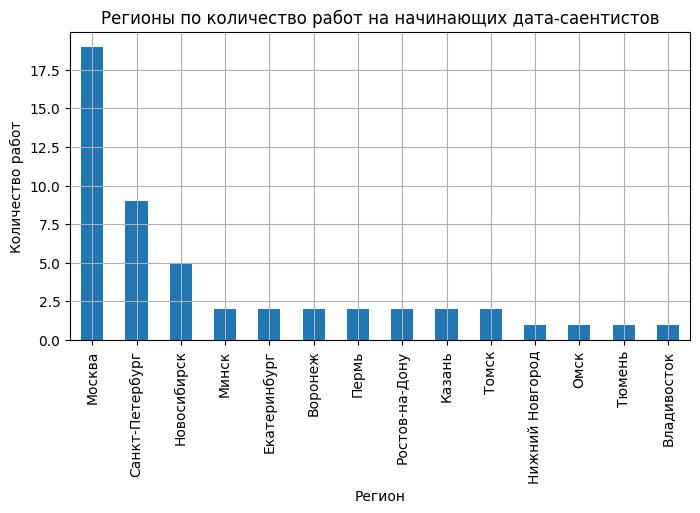

In [60]:
query_1 = f'''
    SELECT 
        a.name as area,
        COUNT(v.id) cnt
    FROM
        vacancies v
        INNER JOIN areas a ON a.id = v.area_id
    WHERE
        (
            v.name ILIKE '%data scientist%'
            OR v.name ILIKE '%data science%'
            OR v.name ILIKE '%исследователь данных%'
            OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
            OR v.name ILIKE '%machine learning%'
            OR v.name ILIKE '%машинн%обучен%'
        )
        AND
        (
            v.name ILIKE '%junior%'
            OR v.experience = 'Нет опыта'
            OR v.employment = 'Стажировка'
        )
    GROUP BY a.id
    ORDER BY cnt DESC
'''
df = sql_query(query_1)
ax = df.plot.bar(
    x='area',
    y='cnt',
    legend=False,
    figsize=(8, 4)
)
ax.set_title('Регионы по количество работ на начинающих дата-саентистов')
ax.grid(True)
ax.set_ylabel('Количество работ')
ax.set_xlabel('Регион')


Вывод: для начинающих дата-сайентистов очень мало открытых вакансий.

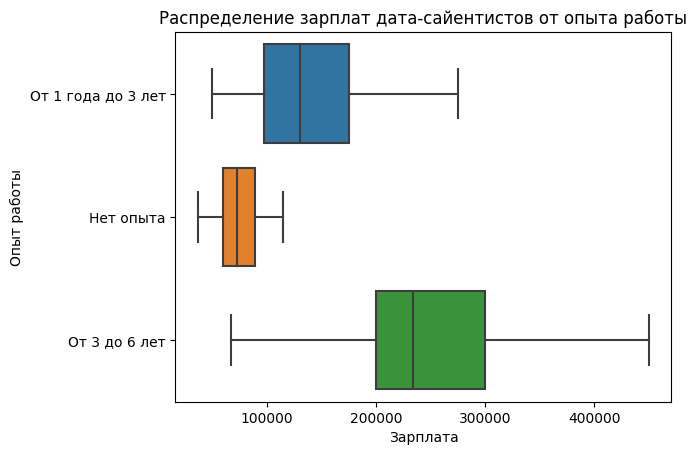

In [72]:

import seaborn as sns

query_2 = f'''
    (
        --- вычисляем зарплату из полной зарплатной вилки
        SELECT
            experience,
            (salary_to + salary_from) / 2 as salary
        FROM
            vacancies
        WHERE
            (
                name ILIKE '%data scientist%'
                OR name ILIKE '%data science%'
                OR name ILIKE '%исследователь данных%'
                OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                OR name ILIKE '%machine learning%'
                OR name ILIKE '%машинн%обучен%'
            )
            AND salary_from IS NOT NULL
            AND salary_to IS NOT NULL
    ) UNION ALL (
        --- собираем данные о зарплате из частичной зарплатной вилки
        SELECT
            experience,
            COALESCE(salary_to, 0) + COALESCE(salary_from, 0) as salary
        FROM
            vacancies
        WHERE
            (
                name ILIKE '%data scientist%'
                OR name ILIKE '%data science%'
                OR name ILIKE '%исследователь данных%'
                OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
                OR name ILIKE '%machine learning%'
                OR name ILIKE '%машинн%обучен%'
            )
            AND
            (
                salary_from IS NOT NULL AND salary_to IS NULL
                OR salary_from IS NULL AND salary_to IS NOT NULL
            )
    )


'''
df = sql_query(query_2)
g = sns.boxplot(
    data=df,
    y='experience',
    x='salary',
).set(
    title='Распределение зарплат дата-сайентистов от опыта работы', 
    xlabel='Зарплата', 
    ylabel='Опыт работы',
)

Вывод: опыт для дата-сайентиста играет большую роль, если судить по зарплате. 

Интересно, что при опыте от 3 до 6 лет получается такой большой разброс в зарплатах - даже есть позиции для опытного дата-сайентиста с зарплатой, которую платят в другом месте для начинающих. Возможно это связано с регионом (предположу, что в Москве новичок может получать столько же, сколько работник с опытым в другом регионе). 

Возможно регион также влияет на вилку зарплат - в регионах отичных от Москвы, Санкт-Петербурга и Новосибирска новичков берут мало, поэтому разброс зарплат для дата-сайентистов без опыта меньше всего.
